In [36]:
import numpy as np
import pandas as pd
import datetime
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Read the Data from Yahoo finance website for last 5 years

In [37]:
stock_symbol = ["AAPL", "GOOGL", "MSFT", "AMZN"]

history={}
for i in stock_symbol:
    history[i] = yahooFinance.Ticker(i).history(period='5y')

In [38]:
for symbol, data in history.items():
    print(f"Stock Symbol: {symbol}")
    print(data)

Stock Symbol: AAPL
                                 Open        High         Low       Close  \
Date                                                                        
2018-11-23 00:00:00-05:00   41.977327   42.375649   41.295862   41.341450   
2018-11-26 00:00:00-05:00   41.809367   41.979732   40.854353   41.900547   
2018-11-27 00:00:00-05:00   41.154287   41.936535   41.003119   41.809361   
2018-11-28 00:00:00-05:00   42.406843   43.501027   41.974927   43.417046   
2018-11-29 00:00:00-05:00   43.829757   43.863350   42.639590   43.083504   
...                               ...         ...         ...         ...   
2023-11-16 00:00:00-05:00  189.570007  190.960007  188.649994  189.710007   
2023-11-17 00:00:00-05:00  190.250000  190.380005  188.570007  189.690002   
2023-11-20 00:00:00-05:00  189.889999  191.910004  189.880005  191.449997   
2023-11-21 00:00:00-05:00  191.410004  191.520004  189.740005  190.639999   
2023-11-22 00:00:00-05:00  191.490005  192.929993  190.83

# 2) Perform cleaning



### Creating a dataframe for stock data

In [39]:
stock_df = pd.concat(history.values(), keys=history.keys(), axis=0)


In [40]:
stock_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [41]:
stock_df.head()

Open       High        Low      Close  \
     Date                                                                    
AAPL 2018-11-23 00:00:00-05:00  41.977327  42.375649  41.295862  41.341450   
     2018-11-26 00:00:00-05:00  41.809367  41.979732  40.854353  41.900547   
     2018-11-27 00:00:00-05:00  41.154287  41.936535  41.003119  41.809361   
     2018-11-28 00:00:00-05:00  42.406843  43.501027  41.974927  43.417046   
     2018-11-29 00:00:00-05:00  43.829757  43.863350  42.639590  43.083504   

                                   Volume  Dividends  Stock Splits  
     Date                                                           
AAPL 2018-11-23 00:00:00-05:00   94496000        0.0           0.0  
     2018-11-26 00:00:00-05:00  179994000        0.0           0.0  
     2018-11-27 00:00:00-05:00  165549600        0.0           0.0  
     2018-11-28 00:00:00-05:00  184250000        0.0           0.0  
     2018-11-29 00:00:00-05:00  167080000        0.0           0.0

In [42]:
stock_df.shape

(5032, 7)

In [43]:
stock_df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [44]:
stock_df.index

MultiIndex([('AAPL', '2018-11-23 00:00:00-05:00'),
            ('AAPL', '2018-11-26 00:00:00-05:00'),
            ('AAPL', '2018-11-27 00:00:00-05:00'),
            ('AAPL', '2018-11-28 00:00:00-05:00'),
            ('AAPL', '2018-11-29 00:00:00-05:00'),
            ('AAPL', '2018-11-30 00:00:00-05:00'),
            ('AAPL', '2018-12-03 00:00:00-05:00'),
            ('AAPL', '2018-12-04 00:00:00-05:00'),
            ('AAPL', '2018-12-06 00:00:00-05:00'),
            ('AAPL', '2018-12-07 00:00:00-05:00'),
            ...
            ('AMZN', '2023-11-09 00:00:00-05:00'),
            ('AMZN', '2023-11-10 00:00:00-05:00'),
            ('AMZN', '2023-11-13 00:00:00-05:00'),
            ('AMZN', '2023-11-14 00:00:00-05:00'),
            ('AMZN', '2023-11-15 00:00:00-05:00'),
            ('AMZN', '2023-11-16 00:00:00-05:00'),
            ('AMZN', '2023-11-17 00:00:00-05:00'),
            ('AMZN', '2023-11-20 00:00:00-05:00'),
            ('AMZN', '2023-11-21 00:00:00-05:00'),
            ('A

### Changing Date & Stock Symbol fields from index to column

In [45]:
stock_df_1 = stock_df.reset_index()
stock_df_1

,level_0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,AAPL,2018-11-23 00:00:00-05:00,41.977327,42.375649,41.295862,41.341450,94496000,0.0,0.0
1,AAPL,2018-11-26 00:00:00-05:00,41.809367,41.979732,40.854353,41.900547,179994000,0.0,0.0
2,AAPL,2018-11-27 00:00:00-05:00,41.154287,41.936535,41.003119,41.809361,165549600,0.0,0.0
3,AAPL,2018-11-28 00:00:00-05:00,42.406843,43.501027,41.974927,43.417046,184250000,0.0,0.0
4,AAPL,2018-11-29 00:00:00-05:00,43.829757,43.863350,42.639590,43.083504,167080000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5027,AMZN,2023-11-16 00:00:00-05:00,140.910004,143.320007,139.520004,142.830002,49653500,0.0,0.0
5028,AMZN,2023-11-17 00:00:00-05:00,142.660004,145.229996,142.539993,145.179993,49636700,0.0,0.0
5029,AMZN,2023-11-20 00:00:00-05:00,145.130005,146.630005,144.729996,146.130005,41951200,0.0,0.0
5030,AMZN,2023-11-21 00:00:00-05:00,143.910004,144.050003,141.500000,143.899994,71226000,0.0,0.0


In [46]:
stock_df_1.rename(columns={'level_0':'Stock_symbol'}, inplace=True)
stock_df_1

,Stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,AAPL,2018-11-23 00:00:00-05:00,41.977327,42.375649,41.295862,41.341450,94496000,0.0,0.0
1,AAPL,2018-11-26 00:00:00-05:00,41.809367,41.979732,40.854353,41.900547,179994000,0.0,0.0
2,AAPL,2018-11-27 00:00:00-05:00,41.154287,41.936535,41.003119,41.809361,165549600,0.0,0.0
3,AAPL,2018-11-28 00:00:00-05:00,42.406843,43.501027,41.974927,43.417046,184250000,0.0,0.0
4,AAPL,2018-11-29 00:00:00-05:00,43.829757,43.863350,42.639590,43.083504,167080000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5027,AMZN,2023-11-16 00:00:00-05:00,140.910004,143.320007,139.520004,142.830002,49653500,0.0,0.0
5028,AMZN,2023-11-17 00:00:00-05:00,142.660004,145.229996,142.539993,145.179993,49636700,0.0,0.0
5029,AMZN,2023-11-20 00:00:00-05:00,145.130005,146.630005,144.729996,146.130005,41951200,0.0,0.0
5030,AMZN,2023-11-21 00:00:00-05:00,143.910004,144.050003,141.500000,143.899994,71226000,0.0,0.0


### Extract year, month, day

In [47]:
stock_df_1['Year'] = stock_df_1['Date'].dt.year
stock_df_1['Month'] = stock_df_1['Date'].dt.month
stock_df_1['Day'] = stock_df_1['Date'].dt.day
stock_df_1.head()

,Stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
0,AAPL,2018-11-23 00:00:00-05:00,41.977327,42.375649,41.295862,41.341450,94496000,0.0,0.0,2018,11,23
1,AAPL,2018-11-26 00:00:00-05:00,41.809367,41.979732,40.854353,41.900547,179994000,0.0,0.0,2018,11,26
2,AAPL,2018-11-27 00:00:00-05:00,41.154287,41.936535,41.003119,41.809361,165549600,0.0,0.0,2018,11,27
3,AAPL,2018-11-28 00:00:00-05:00,42.406843,43.501027,41.974927,43.417046,184250000,0.0,0.0,2018,11,28
4,AAPL,2018-11-29 00:00:00-05:00,43.829757,43.863350,42.639590,43.083504,167080000,0.0,0.0,2018,11,29


# 3) What was the change in stock price over time?

- Considering Amazon stock as an example

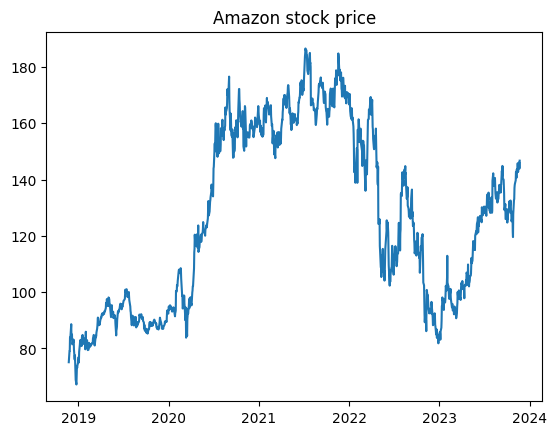

In [48]:
amazon = stock_df_1[stock_df_1['Stock_symbol']=='AMZN']
# amazon
plt.plot(amazon['Date'],amazon['Close'])
plt.title('Amazon stock price')
plt.show()

# 4) Visualize the change in a stock’s volume being traded, over time?

- Considering Amazon for Jan 2022

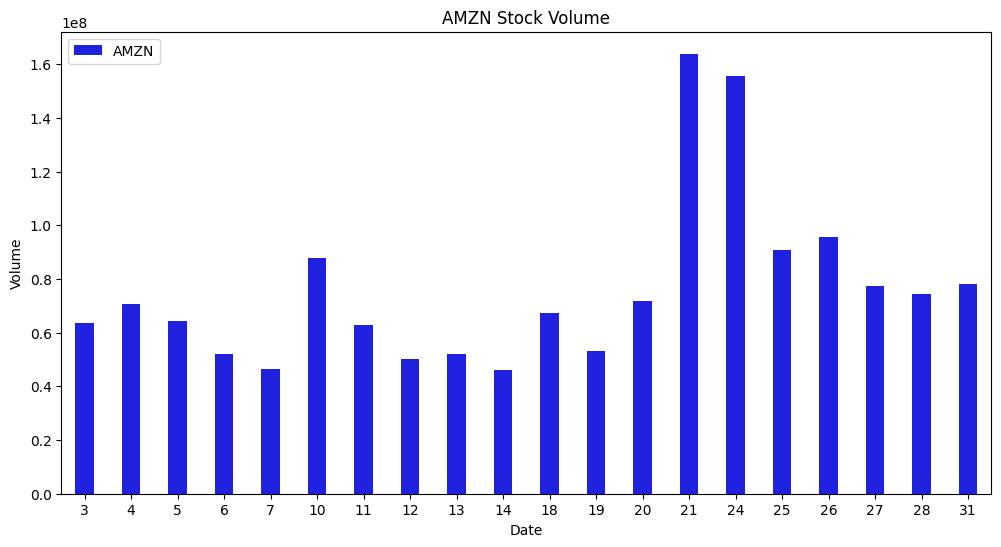

In [49]:
amazon_Jan2022 = amazon[(amazon['Year']==2022) & (amazon['Month']==1)]
# print(amazon_Jan2022.head())

plt.figure(figsize=(12, 6))
plt.title(f"{stock_symbol[-1]} Stock Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
sns.barplot(data=amazon_Jan2022, x=amazon_Jan2022['Day'],y=amazon_Jan2022['Volume'], label=stock_symbol[-1], color='blue',
           width=0.4 )
plt.legend(loc='upper left')
plt.show()

# 5) What was the moving average of various stocks?

### Taking 20 day moving average for various stocks

In [50]:
SMA = pd.DataFrame(stock_df_1.groupby(stock_df_1['Stock_symbol'])['Close'].rolling(window=20).mean())
SMA_1 = SMA.reset_index()
SMA_1.rename(columns={'Close':'MovingAvg'},inplace=True)
SMA_1.columns
# SMA_1['Stock_symbol'].value_counts()

Index(['Stock_symbol', 'level_1', 'MovingAvg'], dtype='object')

### Append moving average column to original data frame

In [51]:
stock_df_1 = pd.concat([stock_df_1,SMA_1['MovingAvg']],axis=1)
stock_df_1.head()

,Stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,MovingAvg
0,AAPL,2018-11-23 00:00:00-05:00,41.977327,42.375649,41.295862,41.341450,94496000,0.0,0.0,2018,11,23,NaN
1,AAPL,2018-11-26 00:00:00-05:00,41.809367,41.979732,40.854353,41.900547,179994000,0.0,0.0,2018,11,26,NaN
2,AAPL,2018-11-27 00:00:00-05:00,41.154287,41.936535,41.003119,41.809361,165549600,0.0,0.0,2018,11,27,NaN
3,AAPL,2018-11-28 00:00:00-05:00,42.406843,43.501027,41.974927,43.417046,184250000,0.0,0.0,2018,11,28,NaN
4,AAPL,2018-11-29 00:00:00-05:00,43.829757,43.863350,42.639590,43.083504,167080000,0.0,0.0,2018,11,29,NaN


### Visualize moving average of various stocks

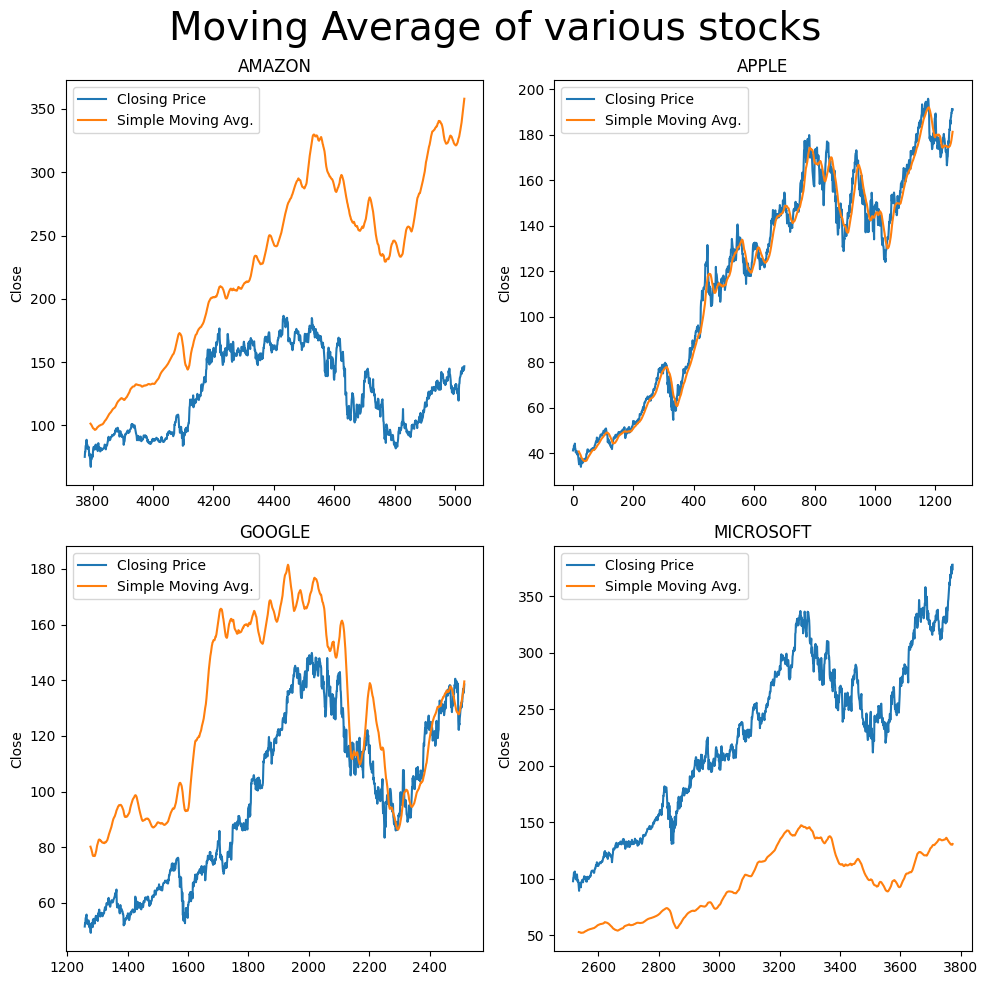

In [52]:
plt.figure(figsize=(10,10))

plt.suptitle('Moving Average of various stocks', fontsize=28, fontweight=20) # Super title

x1 = stock_df_1[stock_df_1['Stock_symbol']=='AMZN']
x2 = stock_df_1[stock_df_1['Stock_symbol']=='AAPL']
x3 = stock_df_1[stock_df_1['Stock_symbol']=='GOOGL']
x4 = stock_df_1[stock_df_1['Stock_symbol']=='MSFT']


plt.subplot(2,2,1) 
sns.lineplot(x1['Close'], label='Closing Price')
sns.lineplot(x1['MovingAvg'], label='Simple Moving Avg.')
plt.title('AMAZON')


plt.subplot(2,2,2)
sns.lineplot(x2['Close'], label='Closing Price')
sns.lineplot(x2['MovingAvg'], label='Simple Moving Avg.')
plt.title('APPLE')

plt.subplot(2,2,3)
sns.lineplot(x3['Close'], label='Closing Price')
sns.lineplot(x3['MovingAvg'], label='Simple Moving Avg.')
plt.title('GOOGLE')

plt.subplot(2,2,4)
sns.lineplot(x4['Close'], label='Closing Price')
sns.lineplot(x4['MovingAvg'], label='Simple Moving Avg.')
plt.title('MICROSOFT')

plt.tight_layout()
plt.show()

# 6) What was the daily return average of a stock?

### Calculating daily returns

In [53]:
stock_df_1['DailyReturns'] = stock_df_1['Close'].pct_change()
stock_df_1.head()

,Stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,MovingAvg,DailyReturns
0,AAPL,2018-11-23 00:00:00-05:00,41.977327,42.375649,41.295862,41.341450,94496000,0.0,0.0,2018,11,23,NaN,NaN
1,AAPL,2018-11-26 00:00:00-05:00,41.809367,41.979732,40.854353,41.900547,179994000,0.0,0.0,2018,11,26,NaN,0.013524
2,AAPL,2018-11-27 00:00:00-05:00,41.154287,41.936535,41.003119,41.809361,165549600,0.0,0.0,2018,11,27,NaN,-0.002176
3,AAPL,2018-11-28 00:00:00-05:00,42.406843,43.501027,41.974927,43.417046,184250000,0.0,0.0,2018,11,28,NaN,0.038453
4,AAPL,2018-11-29 00:00:00-05:00,43.829757,43.863350,42.639590,43.083504,167080000,0.0,0.0,2018,11,29,NaN,-0.007682


### Calculating average of daily returns

In [54]:
daily_return_avg = pd.DataFrame(stock_df_1.groupby('Stock_symbol').DailyReturns.mean())
daily_return_avg['DailyReturns'] = (daily_return_avg['DailyReturns']*100).map('{:,.2f}%'.format)
daily_return_avg.rename(columns={'DailyReturns':'Daily_Return_Avg'}, inplace=True)
daily_return_avg

,Daily_Return_Avg
Stock_symbol,
AAPL,0.14%
AMZN,0.02%
GOOGL,0.04%
MSFT,0.10%


# 7) Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [55]:
stock_df_1['Trend'] = stock_df_1['DailyReturns'].apply(lambda x:
                                                    'Up' if x>0
                                                    else 'Down' if x<0
                                                    else 'Stable')

stock_df_1.head()

,Stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,MovingAvg,DailyReturns,Trend
0,AAPL,2018-11-23 00:00:00-05:00,41.977327,42.375649,41.295862,41.341450,94496000,0.0,0.0,2018,11,23,NaN,NaN,Stable
1,AAPL,2018-11-26 00:00:00-05:00,41.809367,41.979732,40.854353,41.900547,179994000,0.0,0.0,2018,11,26,NaN,0.013524,Up
2,AAPL,2018-11-27 00:00:00-05:00,41.154287,41.936535,41.003119,41.809361,165549600,0.0,0.0,2018,11,27,NaN,-0.002176,Down
3,AAPL,2018-11-28 00:00:00-05:00,42.406843,43.501027,41.974927,43.417046,184250000,0.0,0.0,2018,11,28,NaN,0.038453,Up
4,AAPL,2018-11-29 00:00:00-05:00,43.829757,43.863350,42.639590,43.083504,167080000,0.0,0.0,2018,11,29,NaN,-0.007682,Down


# 8) Visualize trend frequency through a Pie Chart.

In [56]:
Trend_group=pd.DataFrame(stock_df_1[stock_df_1['Year']==2022].groupby('Stock_symbol').Trend.value_counts())
Trend_group1 = Trend_group.reset_index()
Trend_group1

,Stock_symbol,Trend,count
0,AAPL,Down,132
1,AAPL,Up,118
2,AAPL,Stable,1
3,AMZN,Down,135
4,AMZN,Up,116
5,GOOGL,Down,137
6,GOOGL,Up,113
7,GOOGL,Stable,1
8,MSFT,Down,135
9,MSFT,Up,116


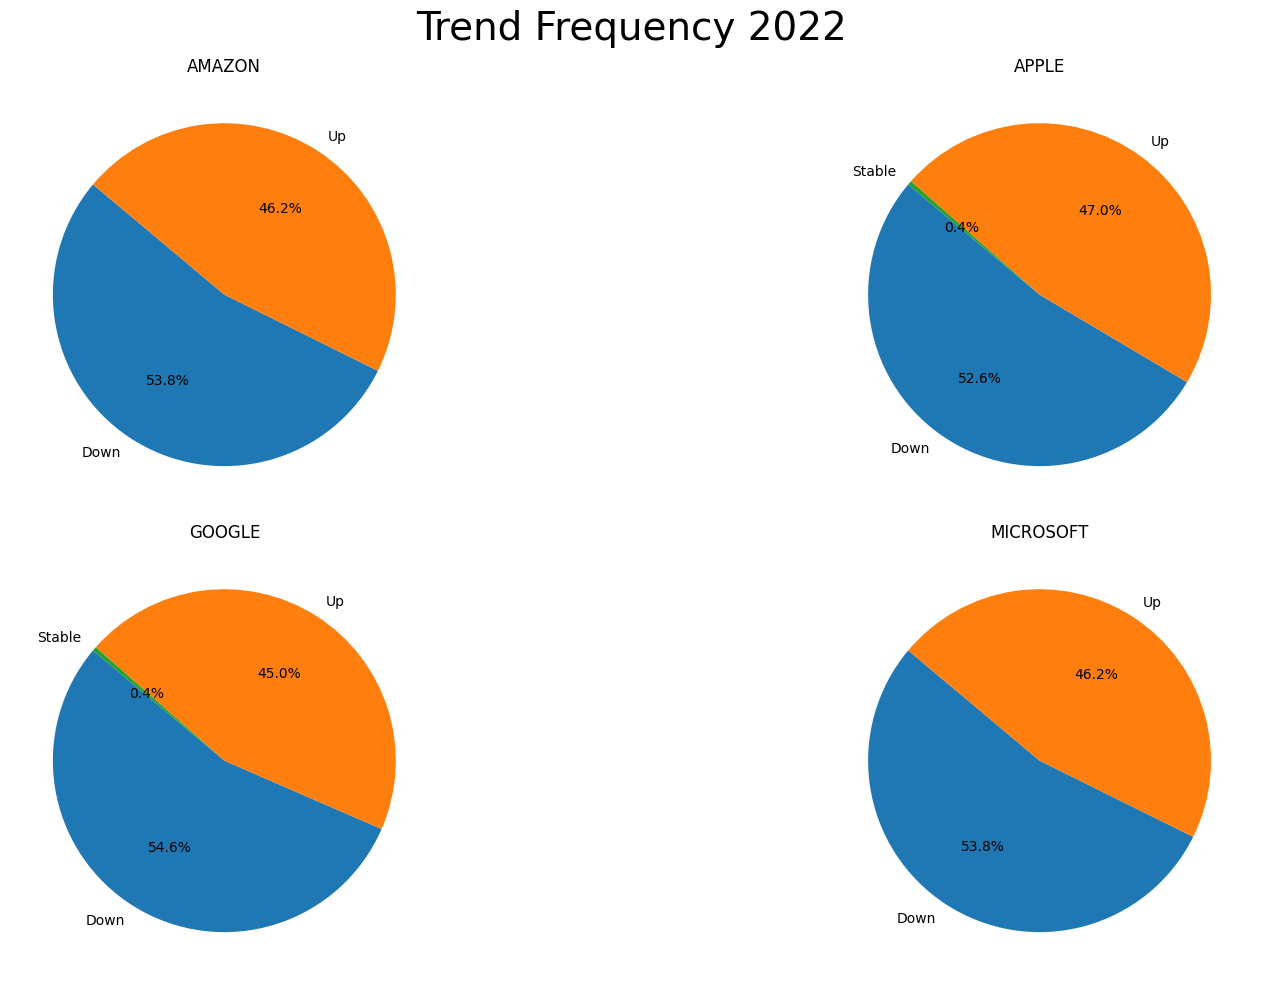

In [57]:
plt.figure(figsize=(20,10))

plt.suptitle('Trend Frequency 2022', fontsize=28, fontweight=20) # Super title

t1 = Trend_group1[Trend_group1['Stock_symbol']=='AMZN']
t2 = Trend_group1[Trend_group1['Stock_symbol']=='AAPL']
t3 = Trend_group1[Trend_group1['Stock_symbol']=='GOOGL']
t4 = Trend_group1[Trend_group1['Stock_symbol']=='MSFT']


plt.subplot(2,2,1) 
plt.pie(t1['count'],labels=t1['Trend'],
        autopct='%1.1f%%',startangle=140)
plt.title('AMAZON')

plt.subplot(2,2,2)
plt.pie(t2['count'],labels=t2['Trend'],
        autopct='%1.1f%%',startangle=140)
plt.title('APPLE')

plt.subplot(2,2,3)
plt.pie(t3['count'],labels=t3['Trend'],
        autopct='%1.1f%%',startangle=140)
plt.title('GOOGLE')

plt.subplot(2,2,4)
plt.pie(t4['count'],labels=t4['Trend'],
        autopct='%1.1f%%',startangle=140)
plt.title('MICROSOFT')


plt.tight_layout()
plt.show()

# 9) What was the correlation between the daily returns of different stocks?

In [58]:
x1 = stock_df_1[stock_df_1['Stock_symbol']=='AMZN']
x2 = stock_df_1[stock_df_1['Stock_symbol']=='AAPL']
x3 = stock_df_1[stock_df_1['Stock_symbol']=='GOOGL']
x4 = stock_df_1[stock_df_1['Stock_symbol']=='MSFT']


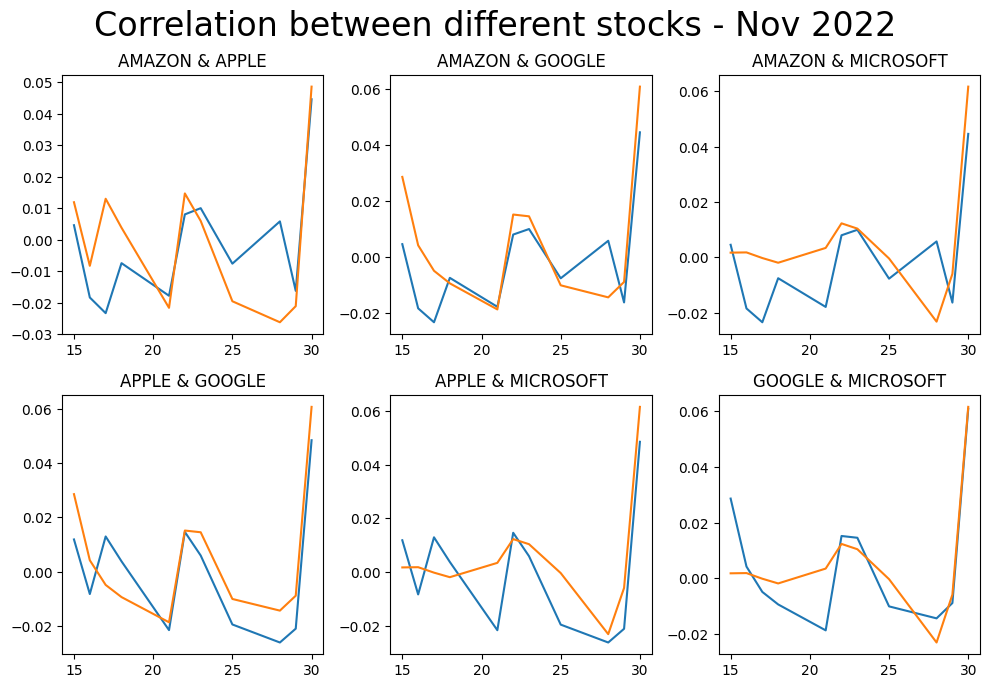

In [59]:
plt.figure(figsize=(10,10))

plt.suptitle('Correlation between different stocks - Nov 2022', fontsize=24, fontweight=20) # Super title

x1_1= x1[(x1['Year']==2022) & (x1['Month']==11) & (x1['Day']>=15)]
x2_1 = x2[(x2['Year']==2022) & (x2['Month']==11) & (x2['Day']>=15)]
x3_1 = x3[(x3['Year']==2022) & (x3['Month']==11) & (x3['Day']>=15)]
x4_1 = x4[(x4['Year']==2022) & (x4['Month']==11) & (x4['Day']>=15)]

x1_1 = x1_1[['Stock_symbol','Day','DailyReturns']]
x2_1 = x2_1[['Stock_symbol','Day','DailyReturns']]
x3_1 = x3_1[['Stock_symbol','Day','DailyReturns']]
x4_1 = x4_1[['Stock_symbol','Day','DailyReturns']]

plt.subplot(3,3,1) 
plt.plot(x1_1['Day'],x1_1['DailyReturns'])
plt.plot(x2_1['Day'],x2_1['DailyReturns'])
plt.title('AMAZON & APPLE')

plt.subplot(3,3,2) 
plt.plot(x1_1['Day'],x1_1['DailyReturns'])
plt.plot(x3_1['Day'],x3_1['DailyReturns'])
plt.title('AMAZON & GOOGLE')

plt.subplot(3,3,3) 
plt.plot(x1_1['Day'],x1_1['DailyReturns'])
plt.plot(x4_1['Day'],x4_1['DailyReturns'])
plt.title('AMAZON & MICROSOFT')

plt.subplot(3,3,4) 
plt.plot(x2_1['Day'],x2_1['DailyReturns'])
plt.plot(x3_1['Day'],x3_1['DailyReturns'])
plt.title('APPLE & GOOGLE')

plt.subplot(3,3,5) 
plt.plot(x2_1['Day'],x2_1['DailyReturns'])
plt.plot(x4_1['Day'],x4_1['DailyReturns'])
plt.title('APPLE & MICROSOFT')

plt.subplot(3,3,6) 
plt.plot(x3_1['Day'],x3_1['DailyReturns'])
plt.plot(x4_1['Day'],x4_1['DailyReturns'])
plt.title('GOOGLE & MICROSOFT')

plt.tight_layout()
plt.show()

As you can see, there is a strong positive correlation between the daily returns of all four stocks. This means that when one stock goes up, the others are likely to go up as well, and when one stock goes down, the others are likely to go down as well.

From the above graphs we can infer that Apple & Google have the highest correlation.

# End of Project